In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing

In [2]:
%cd /content/drive/MyDrive/machine_learning_projects/salary_prediction

/content/drive/MyDrive/machine_learning_projects/salary_prediction


In [3]:
%pwd

'/content/drive/MyDrive/machine_learning_projects/salary_prediction'

In [4]:
#read dataset
#from config import data_path
#df = pd.read_csv(data_path)

In [4]:
#split
from custom_funcs import split
df,X_train, X_test = split(0.2)

In [5]:
# feature engineering notebook
from custom_funcs import subtract_nan
X_train = X_train.apply(subtract_nan, axis = 1)

In [6]:
# replace missing values with mean
X_train['AGE'].fillna(value=int(X_train['AGE'].median()), inplace=True)

<Figure size 700x500 with 0 Axes>

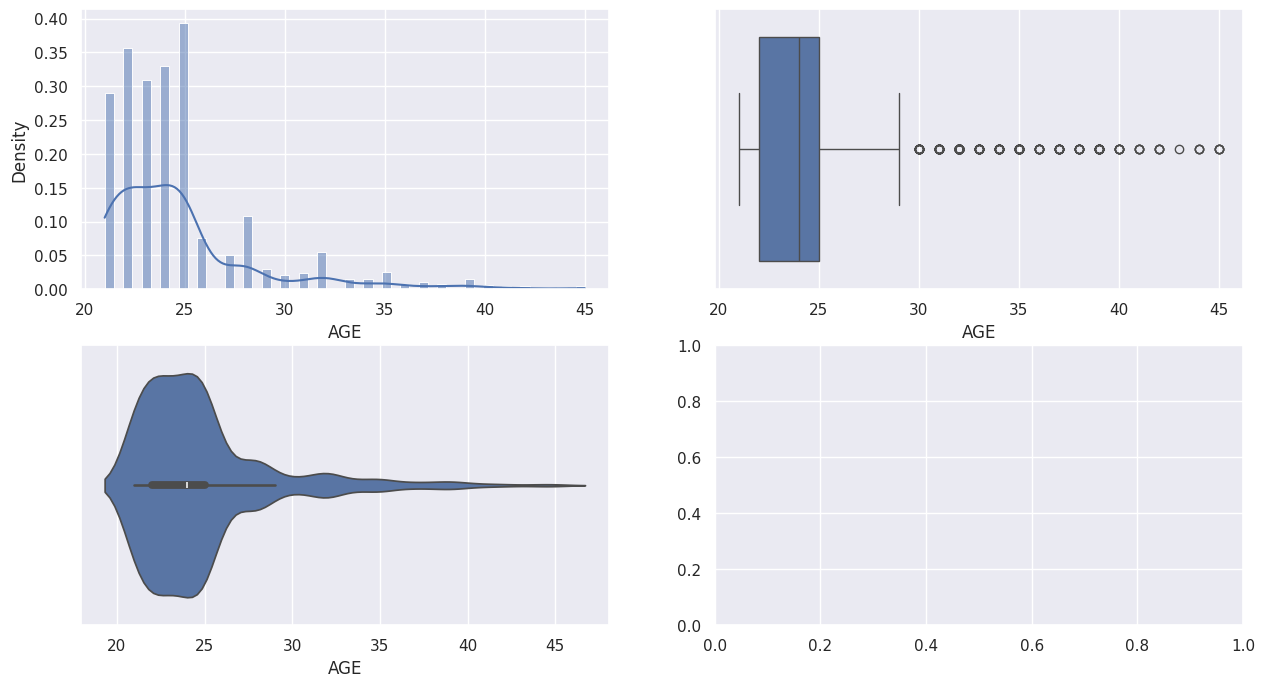

In [7]:
from custom_funcs import vis
vis(X_train,'AGE')

In [8]:
# replace missing values with mode
X_train['RATINGS'].fillna(value=int(X_train['RATINGS'].mode()), inplace=True)

<Figure size 700x500 with 0 Axes>

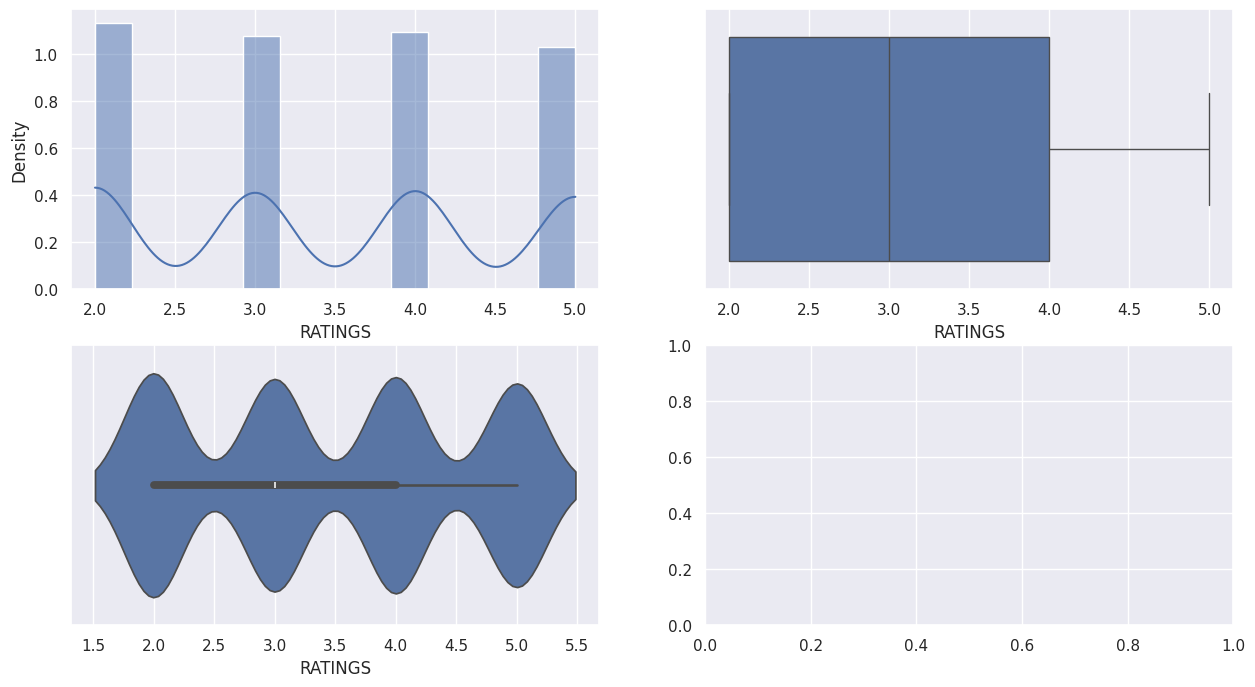

In [9]:
vis(X_train,'RATINGS')

In [10]:
X_train.drop(columns =['FIRST NAME','LAST NAME'],inplace = True)

In [11]:
X_train.isna().sum()

SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [12]:
X_train.dropna(inplace=True)

In [13]:
from custom_funcs import type_casting

In [14]:
data_types_dict = {
    'int': ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS'],
    'datetime': ['DOJ','CURRENT DATE']
}

In [15]:
type_casting(X_train,data_types_dict)

In [16]:
from custom_funcs import convert_dates_to_duration
convert_dates_to_duration(X_train,'DOJ','CURRENT DATE')

#handelling outliers

In [17]:
from custom_funcs import outliers_handeler
have_outliers = ['AGE', 'PAST EXP']
outliers_handeler(X_train,have_outliers)


<Axes: xlabel='UNIT'>

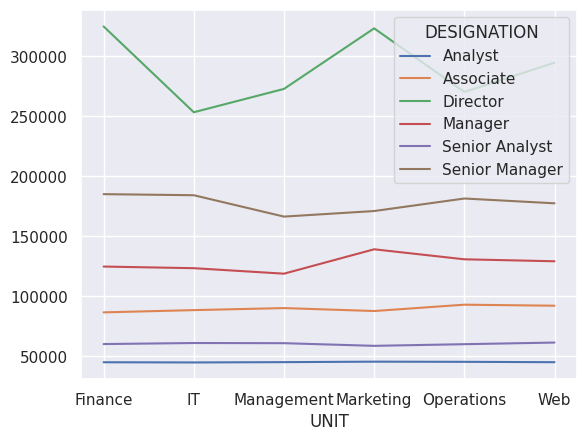

In [18]:
X_train.groupby(['UNIT', 'DESIGNATION'])['SALARY'].median().unstack().plot()

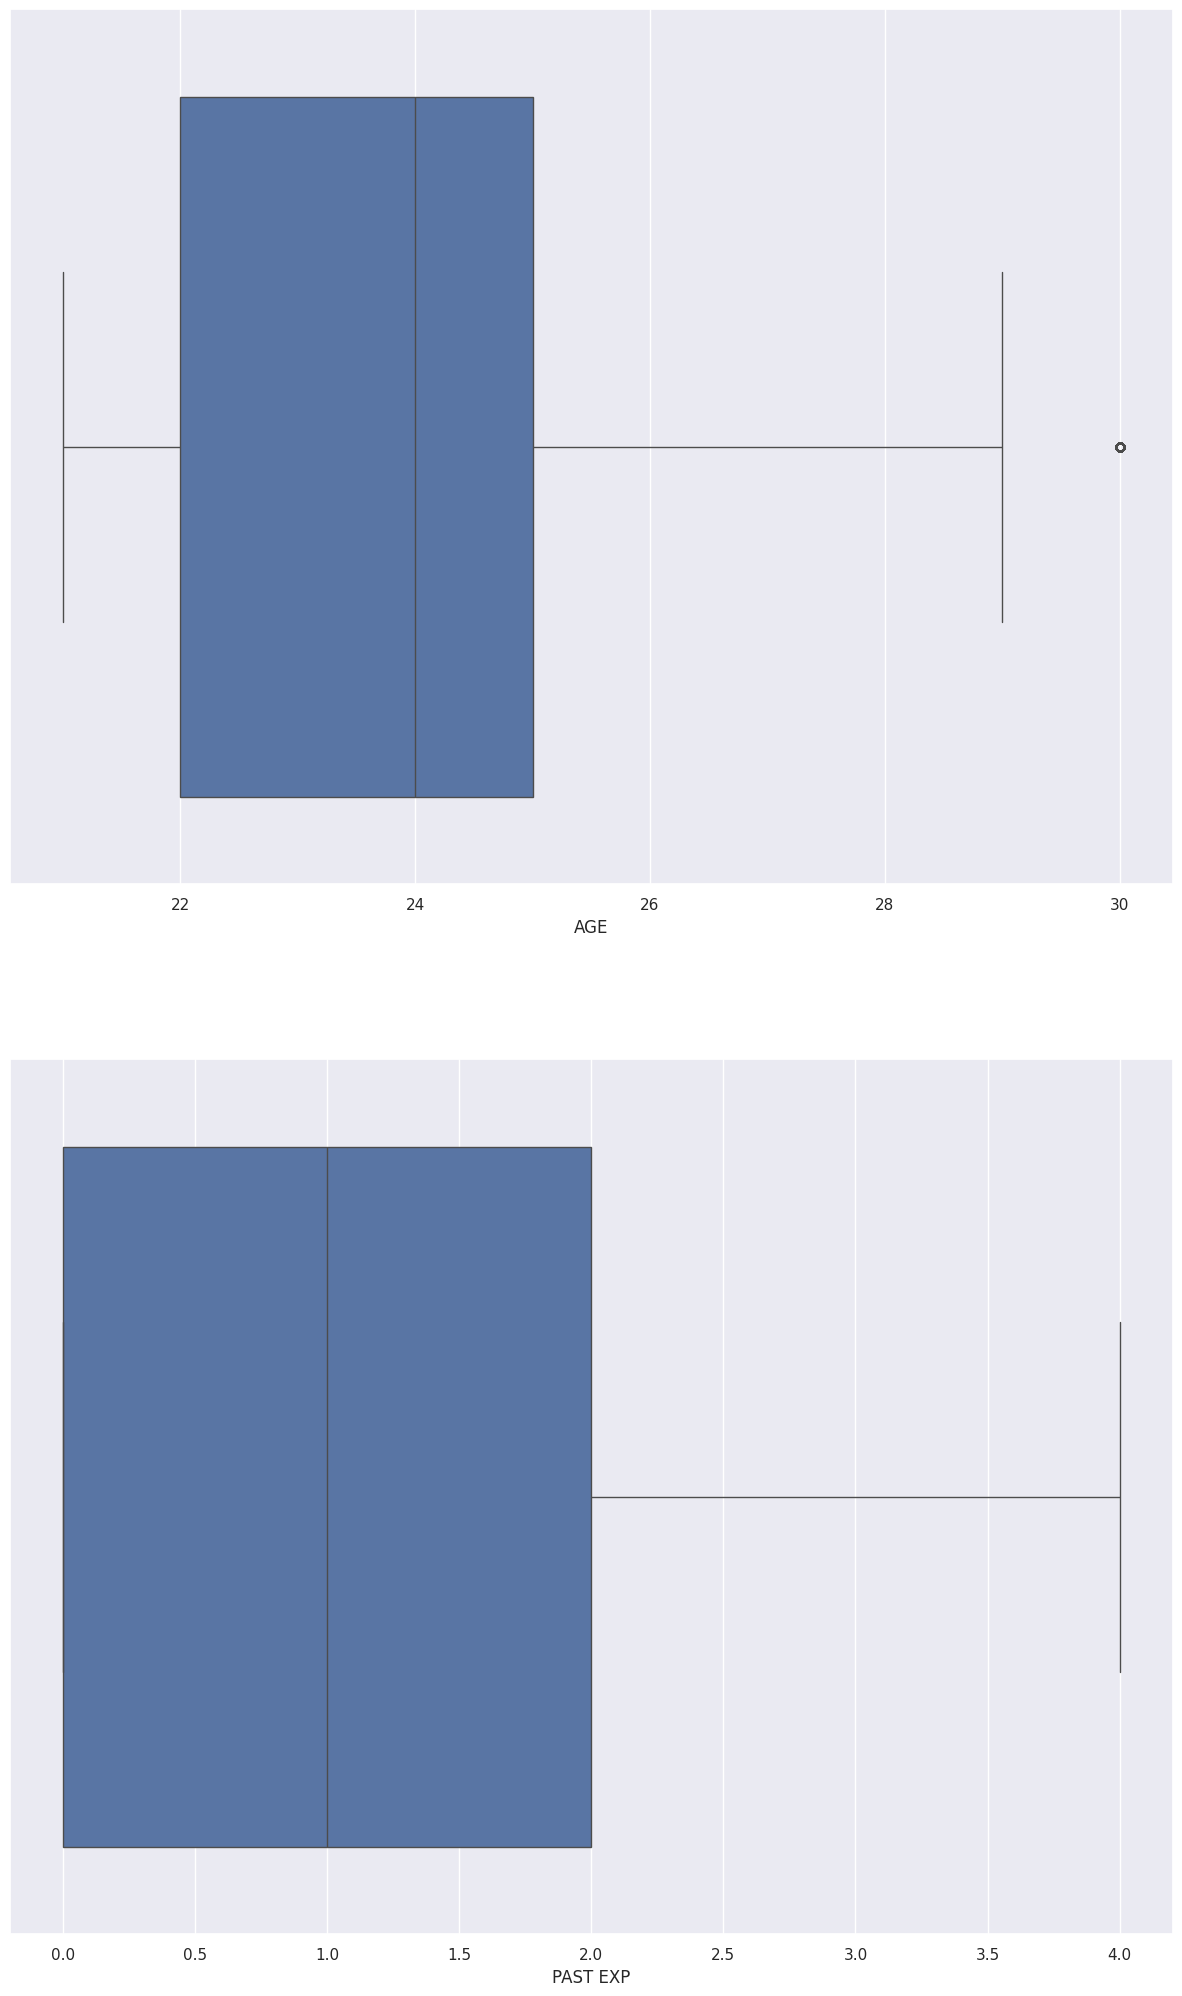

In [19]:
fig, axes = plt.subplots(len(have_outliers), figsize = (15,25))
for i, feature in enumerate(have_outliers):
  sns.boxplot(x = X_train[feature], ax = axes[i])
  plt.xlabel(feature)

#remove duplicates

In [20]:
from custom_funcs import remove_duplicates

In [21]:
remove_duplicates(X_train)

nuber of duplicats =  100
assumed numbers of rows remaining =  2011
number of rows after removing the duplicates =  2011


#encoding

In [22]:
from custom_funcs import label_encoding #after experimenting replacing the categories manually shows higher correlation with the target feature than using the label encoding from sklearn

In [23]:
order = ['M','F']
label_encoding(X_train,'SEX', order)

In [24]:
order = ['Analyst','Senior Analyst','Associate','Manager','Senior Manager','Director']
label_encoding(X_train,'DESIGNATION', order)

In [25]:
X_train = pd.get_dummies(X_train, columns = ['UNIT'])

In [26]:
X_train

,SEX,DESIGNATION,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,nb_months,yearsMonths,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,0,0,21.0,41854,29,1,5,0.0,12,1.000000,0,0,0,0,1,0
1,0,0,24.0,48222,29,1,3,2.0,13,1.083333,0,0,0,1,0,0
2,0,1,26.0,52198,25,5,5,4.0,12,1.000000,0,0,0,0,0,1
3,0,0,25.0,40786,25,5,5,2.0,19,1.583333,0,1,0,0,0,0
4,1,1,28.0,60183,24,6,5,1.0,47,3.916667,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,0,2,30.0,97708,29,1,2,4.0,50,4.166667,0,1,0,0,0,0
2007,0,1,25.0,64112,19,11,3,0.0,13,1.083333,0,0,1,0,0,0
2008,1,0,23.0,47376,25,5,3,0.0,23,1.916667,0,0,0,0,0,1
2009,0,0,22.0,43671,18,12,5,0.0,21,1.750000,0,0,1,0,0,0


#log transformation

In [27]:
X_train['AGE'] = np.log(X_train['AGE'])
X_train['SALARY'] = np.log(X_train['SALARY'])

check if nb_months and yearsonths need log transformation

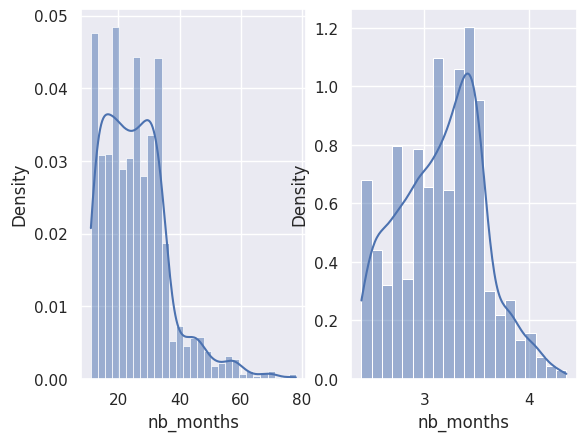

1.191846348557567 after log transformation  0.17550365811774704


In [28]:
plt.subplot(1,2,1)
sns.histplot(x = X_train['nb_months'],kde = True,stat = 'density')
plt.subplot(1,2,2)
sns.histplot(x =  np.log(X_train['nb_months']),kde = True,stat = 'density')
plt.show()
print(X_train['nb_months'].skew(),"after log transformation ",np.log(X_train['nb_months'].skew()))

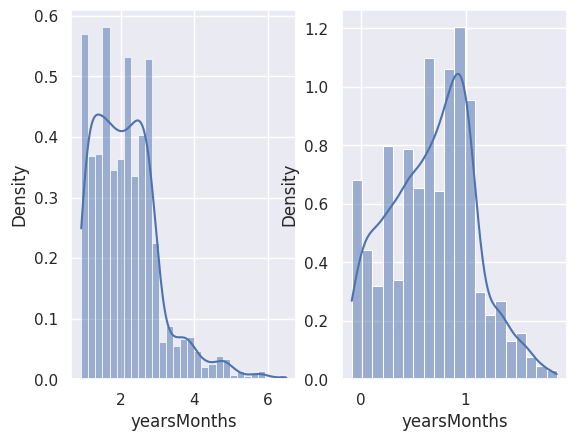

1.1918463485575668 after log transformation  0.17550365811774687


In [29]:
plt.subplot(1,2,1)
sns.histplot(x = X_train['yearsMonths'],kde = True,stat = 'density')
plt.subplot(1,2,2)
sns.histplot(x =  np.log(X_train['yearsMonths']),kde = True,stat = 'density')
plt.show()

print(X_train['yearsMonths'].skew(),"after log transformation ",np.log(X_train['yearsMonths'].skew()))

lokking at the histogram and the skewness of each, it is better to log transform them

In [30]:
X_train['nb_months_log'] = np.log(X_train['nb_months'])
X_train['yearsMonths_log'] = np.log(X_train['yearsMonths'])

since past exp feature has zero values, it cant be log transformed will divide it into bins and encode it

#bining past exp

In [31]:
from custom_funcs import past_exp_binning
X_train['PAST EXP grouped'] = X_train['PAST EXP'].apply(past_exp_binning)

In [32]:
X_train['PAST EXP grouped'].value_counts()

0      992
1~3    770
4~9    249
Name: PAST EXP grouped, dtype: int64

#encode

In [33]:
order = ['0','1~3','4~9','10~18','19~23']
label_encoding(X_train,'PAST EXP grouped', order)

<Axes: xlabel='PAST EXP grouped', ylabel='Density'>

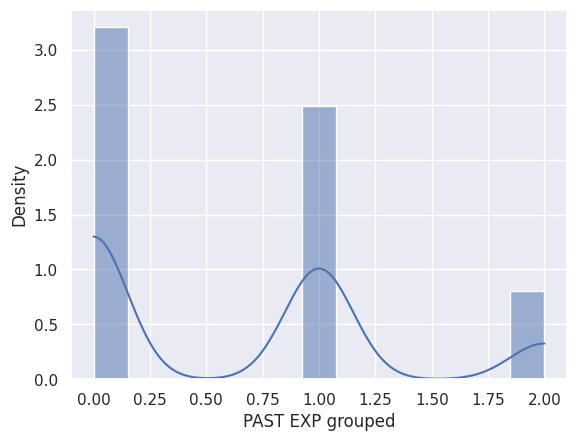

In [34]:
sns.histplot(x = X_train['PAST EXP grouped'],kde = True,stat = 'density')

<Axes: ylabel='PAST EXP grouped'>

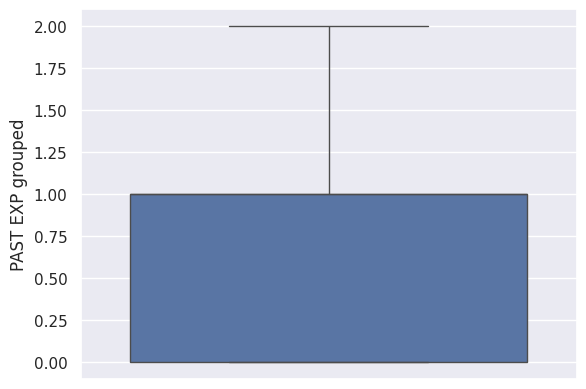

In [35]:
sns.boxplot(X_train['PAST EXP grouped'])

check for extreme mean and std to z-score them

In [36]:
X_train.describe()

,SEX,DESIGNATION,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,nb_months,yearsMonths,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web,nb_months_log,yearsMonths_log,PAST EXP grouped
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,0.514172,0.504724,3.184819,10.878709,22.537046,7.462954,3.464446,1.135753,25.771258,2.147605,0.169567,0.177026,0.160617,0.157136,0.173545,0.162108,3.166731,0.681825,0.630532
std,0.499923,1.049687,0.107775,0.370210,4.623431,4.623431,1.117969,1.402900,10.848454,0.904038,0.375346,0.381786,0.367268,0.364019,0.378812,0.368642,0.405902,0.405902,0.693425
min,0.000000,0.000000,3.044522,10.596660,15.000000,0.000000,2.000000,0.000000,11.000000,0.916667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.397895,-0.087011,0.000000
25%,0.000000,0.000000,3.091042,10.678986,19.000000,3.000000,2.000000,0.000000,17.000000,1.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.833213,0.348307,0.000000
50%,1.000000,0.000000,3.178054,10.752377,22.000000,8.000000,3.000000,1.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.178054,0.693147,1.000000
75%,1.000000,1.000000,3.218876,10.833937,27.000000,11.000000,4.000000,2.000000,32.000000,2.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.465736,0.980829,1.000000
max,1.000000,5.000000,3.401197,12.869049,30.000000,15.000000,5.000000,4.000000,78.000000,6.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.356709,1.871802,2.000000


In [37]:
X_train['LEAVES REMAINING Z'] = (X_train['LEAVES REMAINING']-X_train['LEAVES REMAINING'].mean()) / (X_train['LEAVES REMAINING'].std())
X_train['LEAVES USED Z'] = (X_train['LEAVES USED']-X_train['LEAVES USED'].mean()) / (X_train['LEAVES USED'].std())

In [38]:
X_train.describe()

,SEX,DESIGNATION,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,nb_months,yearsMonths,...,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web,nb_months_log,yearsMonths_log,PAST EXP grouped,LEAVES REMAINING Z,LEAVES USED Z
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,...,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03,2.011000e+03
mean,0.514172,0.504724,3.184819,10.878709,22.537046,7.462954,3.464446,1.135753,25.771258,2.147605,...,0.177026,0.160617,0.157136,0.173545,0.162108,3.166731,0.681825,0.630532,-3.533281e-17,3.533281e-17
std,0.499923,1.049687,0.107775,0.370210,4.623431,4.623431,1.117969,1.402900,10.848454,0.904038,...,0.381786,0.367268,0.364019,0.378812,0.368642,0.405902,0.405902,0.693425,1.000000e+00,1.000000e+00
min,0.000000,0.000000,3.044522,10.596660,15.000000,0.000000,2.000000,0.000000,11.000000,0.916667,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.397895,-0.087011,0.000000,-1.614159e+00,-1.630185e+00
25%,0.000000,0.000000,3.091042,10.678986,19.000000,3.000000,2.000000,0.000000,17.000000,1.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.833213,0.348307,0.000000,-9.652904e-01,-7.650263e-01
50%,1.000000,0.000000,3.178054,10.752377,22.000000,8.000000,3.000000,1.000000,24.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.178054,0.693147,1.000000,1.161575e-01,-1.161575e-01
75%,1.000000,1.000000,3.218876,10.833937,27.000000,11.000000,4.000000,2.000000,32.000000,2.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.465736,0.980829,1.000000,7.650263e-01,9.652904e-01
max,1.000000,5.000000,3.401197,12.869049,30.000000,15.000000,5.000000,4.000000,78.000000,6.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.356709,1.871802,2.000000,1.630185e+00,1.614159e+00


#rare categories handeling

In [39]:
X_train['DESIGNATION'].value_counts(normalize = True)

0    0.744903
1    0.121830
2    0.064644
3    0.032819
4    0.023869
5    0.011934
Name: DESIGNATION, dtype: float64

In [40]:
X_train['DESIGNATION M'] = X_train['DESIGNATION'].replace({4:3,5:3})

In [41]:
X_train['DESIGNATION M'].value_counts(normalize = True)

0    0.744903
1    0.121830
3    0.068623
2    0.064644
Name: DESIGNATION M, dtype: float64

In [42]:
X_train.head(5)

,SEX,DESIGNATION,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,nb_months,yearsMonths,...,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web,nb_months_log,yearsMonths_log,PAST EXP grouped,LEAVES REMAINING Z,LEAVES USED Z,DESIGNATION M
0,0,0,3.044522,10.641943,29,1,5,0.0,12,1.000000,...,0,0,1,0,2.484907,0.000000,0,-1.397870,1.397870,0
1,0,0,3.178054,10.783571,29,1,3,2.0,13,1.083333,...,0,1,0,0,2.564949,0.080043,1,-1.397870,1.397870,0
2,0,1,3.258097,10.862799,25,5,5,4.0,12,1.000000,...,0,0,0,1,2.484907,0.000000,2,-0.532711,0.532711,1
3,0,0,3.218876,10.616094,25,5,5,2.0,19,1.583333,...,0,0,0,0,2.944439,0.459532,1,-0.532711,0.532711,0
4,1,1,3.332205,11.005145,24,6,5,1.0,47,3.916667,...,0,1,0,0,3.850148,1.365241,1,-0.316422,0.316422,1


#saving feature engineered dataset

In [65]:
%mkdir /content/drive/MyDrive/machine_learning_projects/salary_prediction/data

In [43]:
path_of_data = '/content/drive/MyDrive/machine_learning_projects/salary_prediction/data'

In [44]:
df.to_csv(path_of_data+'/data.csv', index = False)
X_train.to_csv(path_of_data+'/X_train.csv', index = False)
X_test.to_csv(path_of_data+'/X_test.csv', index = False)